In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2

# 2.1. Histogram

In [65]:
#reading the image
cameraMan = cv2.imread('Camera Man.bmp', cv2.IMREAD_GRAYSCALE)

In [66]:
def quantize(image, n_bits):
    coeff = 2**8 // 2**n_bits
    coeff2= 2**8 // (2**n_bits - 1)
    return (image // coeff) * coeff2

In [78]:
flat=cameraMan.flatten()

In [79]:
def hist(image):
	m, n = image.shape
	hist = [0.0] * 256
	for i in range(m):
		for j in range(n):
			hist[image[i, j]]+=1
	return np.array(hist)/(m*n)

In [80]:
def cdf(hist):
	return [sum(hist[:i+1]) for i in range(len(hist))]

In [81]:
def histeq(image):
	h = hist(image)
	cumsum = np.array(cdf(h))
	sk = np.uint8(255 * cumsum)
	s1, s2 = image.shape
	new_img = np.zeros_like(image)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			new_img[i, j] = sk[image[i, j]]
	Hist = hist(new_img)
	#return transformed image, original and new histogram, 
	# and transform function
	return new_img , Hist

***

### 2.1.1. Write a program that can compute the histogram of a grayscale image. (Test on Camera Man)

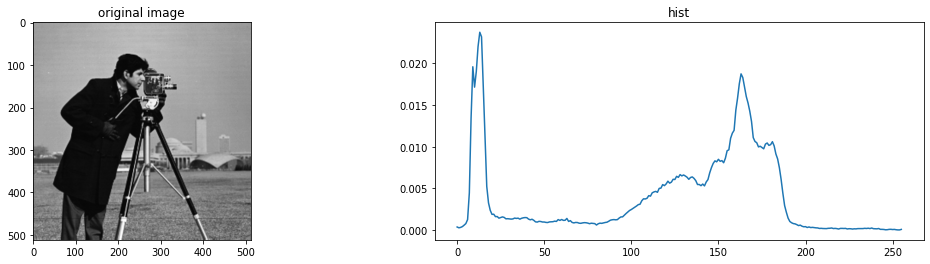

In [82]:
plt.subplot(121)
plt.imshow(cameraMan)
plt.title('original image')

orghist = hist(np.uint8(cameraMan))

plt.subplot(122)
plt.plot(orghist)
plt.title('hist')
plt.set_cmap('gray')
plt.subplots_adjust(right=2.5, wspace=0.1)
plt.show()

***

### 2.1.2. Perform histogram equalization on a grayscale image and compare the new image with the original image. (Test on Camera Man)

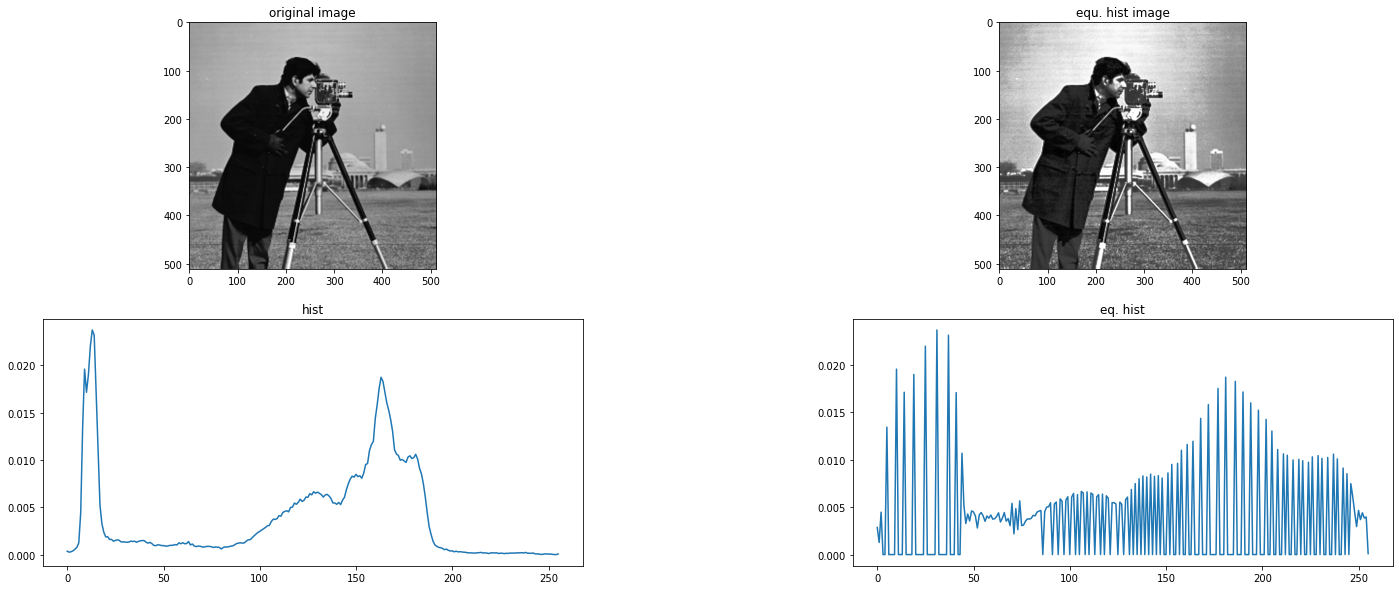

In [89]:
orghist = hist(np.uint8(cameraMan))
equimg, ehist = histeq(cameraMan)
plt.figure(figsize=(10,10))
plt.subplots_adjust(right=2, wspace=0.5)

plt.subplot(221)
plt.title('original image')
plt.imshow(cameraMan)

plt.subplot(222)
plt.title('equ. hist image')
plt.imshow(equimg)


plt.subplot(223)
plt.title('hist')
plt.plot(orghist)

plt.subplot(224)
plt.title('eq. hist')
plt.plot(ehist)

plt.show()

****
****
****

## 2.2. Filters

#### 2.2.1. Write a program that can, first, add salt-and-pepper noise to an image with a specified noise density. Try different noise density (0.05, 0.1, 0.2, 0.4). Then, perform median filtering with a specified window size. Consider only the median filter with a square shape. For each density, discuss the effect of filtering with different window sizes (3, 5, 7, 9) and experimentally determine the best window size. Note: you can use imnoise and MSE functions to generate noisy images and compare the quality of images, respectively. Also, you can ignore the boundary problem by only performing the filtering for the pixels inside the boundary. (Test on grayscale Elaine Image).

In [67]:
elaine = cv2.imread('Elaine.bmp', cv2.IMREAD_GRAYSCALE)

In [68]:
def salt_pepper(noise_density, img):
    """
    Apply salt and pepper noise to an image.

    Args:
        noise_density (float): Density of the noise, ranging from 0 to 1.
        img (numpy array): Input image.

    Returns:
        numpy array: Image with salt and pepper noise applied.
    """
    salt_pepper_noise = np.zeros(img.shape, np.uint8)
    cv2.randu(salt_pepper_noise, 0, 255)
    black = salt_pepper_noise < 255 * noise_density / 2
    white = salt_pepper_noise > 255 * (1 - noise_density / 2)
    salt_pepper_noise[black] = 0
    salt_pepper_noise[white] = 255
    noisy_img = cv2.addWeighted(img, 1 - noise_density, salt_pepper_noise, noise_density, 0)
    return noisy_img

Text(0.5, 1.0, 'original image')

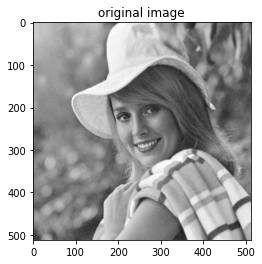

In [10]:
plt.imshow(elaine)
plt.set_cmap('gray')
plt.title('original image')

***

#### with 0.05 density

Text(0.5, 1.0, 'Noisy image with 0.05 density\n')

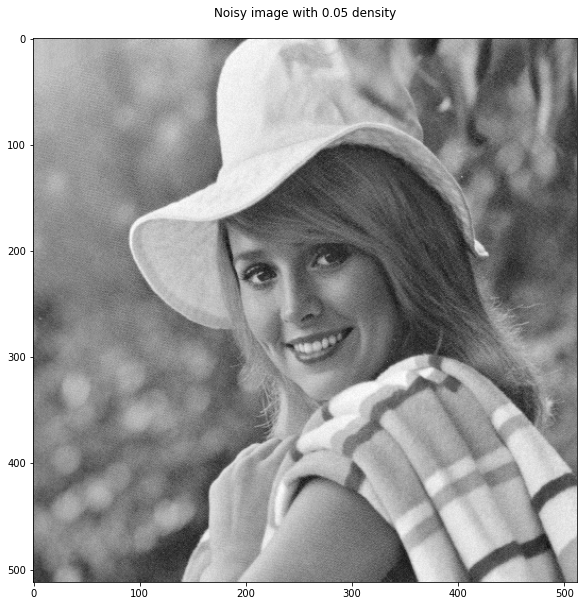

In [7]:
plt.figure(figsize=(10,10))
Noisy_image = salt_pepper(0.05 , elaine) 
plt.imshow(Noisy_image)
plt.title('Noisy image with 0.05 density'+"\n")

 MSE: 34.97751998901367


Text(0.5, 1.0, 'filtered by 3x3 median filter\n')

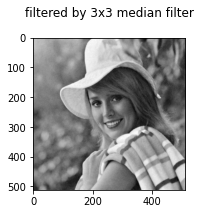

In [9]:
window_size = 3
filtered_img = cv2.medianBlur(Noisy_image, window_size)
plt.subplot(121)
plt.imshow(filtered_img)

img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.title('filtered by 3x3 median filter'+"\n")

 MSE: 38.77574920654297


Text(0.5, 1.0, 'filtered by 5x5 median filter\n')

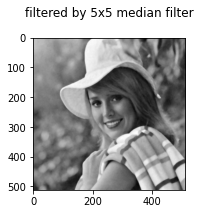

In [11]:
window_size = 5
filtered_img = cv2.medianBlur(Noisy_image, window_size)
plt.subplot(121)
img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 5x5 median filter'+"\n")

 MSE: 40.896385192871094


Text(0.5, 1.0, 'filtered by 7x7 median filter\n')

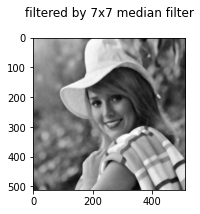

In [12]:
window_size = 7
filtered_img = cv2.medianBlur(Noisy_image, window_size)
plt.subplot(121)
img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 7x7 median filter'+"\n")

 MSE: 44.405757904052734


Text(0.5, 1.0, 'filtered by 9x9 median filter\n')

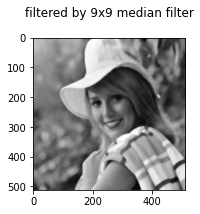

In [13]:
window_size = 9
filtered_img = cv2.medianBlur(Noisy_image, window_size)
plt.subplot(121)
img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 9x9 median filter'+"\n")

#### with 0.1 density

Text(0.5, 1.0, 'Noisy image with 0.1 density\n')

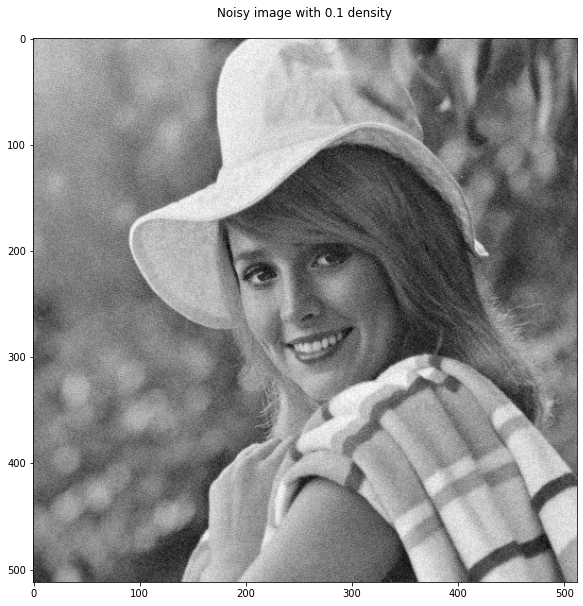

In [16]:
plt.figure(figsize=(10,10))
Noisy_image1 = salt_pepper(0.1 , elaine) 
plt.imshow(Noisy_image1)
plt.title('Noisy image with 0.1 density'+"\n")

 MSE: 53.135501861572266


Text(0.5, 1.0, 'filtered by 3x3 median filter\n')

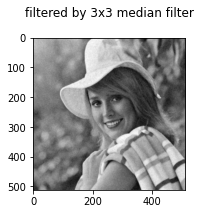

In [17]:
window_size = 3
filtered_img = cv2.medianBlur(Noisy_image1, window_size)
plt.subplot(121)

img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")
plt.imshow(filtered_img)

plt.title('filtered by 3x3 median filter'+"\n")

 MSE: 54.01948928833008


Text(0.5, 1.0, 'filtered by 5x5 median filter\n')

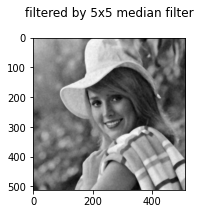

In [18]:
window_size = 5
filtered_img = cv2.medianBlur(Noisy_image1, window_size)
plt.subplot(121)


img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 5x5 median filter'+"\n")

 MSE: 55.14986038208008


Text(0.5, 1.0, 'filtered by 7x7 median filter\n')

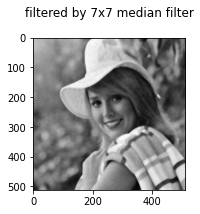

In [19]:
window_size = 7
filtered_img = cv2.medianBlur(Noisy_image1, window_size)
plt.subplot(121)


img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 7x7 median filter'+"\n")

 MSE: 57.65930938720703


Text(0.5, 1.0, 'filtered by 9x9 median filter\n')

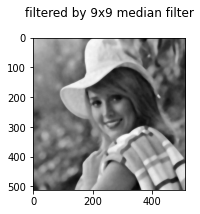

In [20]:
window_size = 9
filtered_img = cv2.medianBlur(Noisy_image1, window_size)
plt.subplot(121)

img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 9x9 median filter'+"\n")

#### with 0.2 density

Text(0.5, 1.0, 'Noisy image with 0.2 density\n')

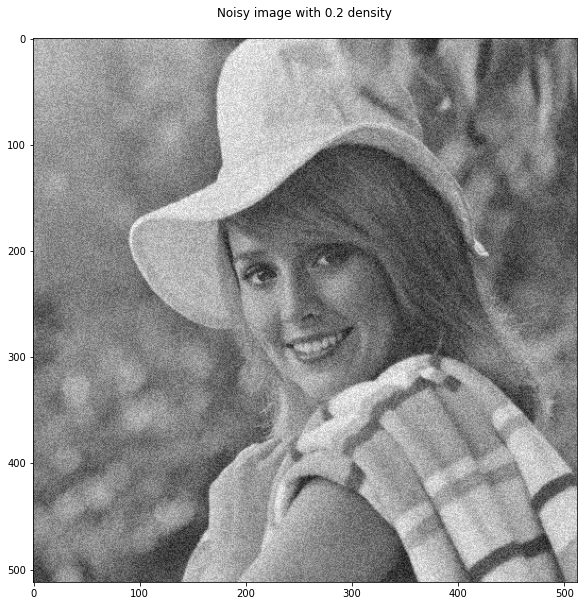

In [21]:
Noisy_image2 = salt_pepper(0.2 , elaine) 
plt.figure(figsize=(10,10))
plt.imshow(Noisy_image2)
plt.title('Noisy image with 0.2 density'+"\n")

 MSE: 75.8407096862793


Text(0.5, 1.0, 'filtered by 3x3 median filter\n')

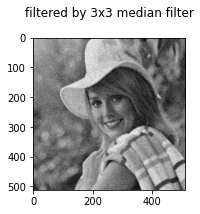

In [22]:
window_size = 3
filtered_img = cv2.medianBlur(Noisy_image2, window_size)
plt.subplot(121)

img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 3x3 median filter'+"\n")

 MSE: 73.9785041809082


Text(0.5, 1.0, 'filtered by 5x5 median filter\n')

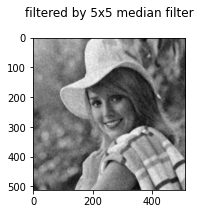

In [23]:
window_size = 5
filtered_img = cv2.medianBlur(Noisy_image2, window_size)
plt.subplot(121)

img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 5x5 median filter'+"\n")

 MSE: 73.88850021362305


Text(0.5, 1.0, 'filtered by 7x7 median filter\n')

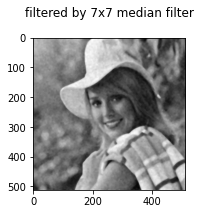

In [24]:
window_size = 7
filtered_img = cv2.medianBlur(Noisy_image2, window_size)
plt.subplot(121)

img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 7x7 median filter'+"\n")

 MSE: 74.92977142333984


Text(0.5, 1.0, 'filtered by 9x9 median filter\n')

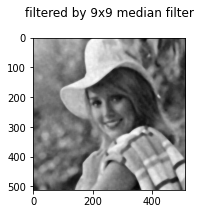

In [25]:
window_size = 9
filtered_img = cv2.medianBlur(Noisy_image2, window_size)
plt.subplot(121)

img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 9x9 median filter'+"\n")

#### with 0.4 density

Text(0.5, 1.0, 'Noisy image with 0.4 density\n')

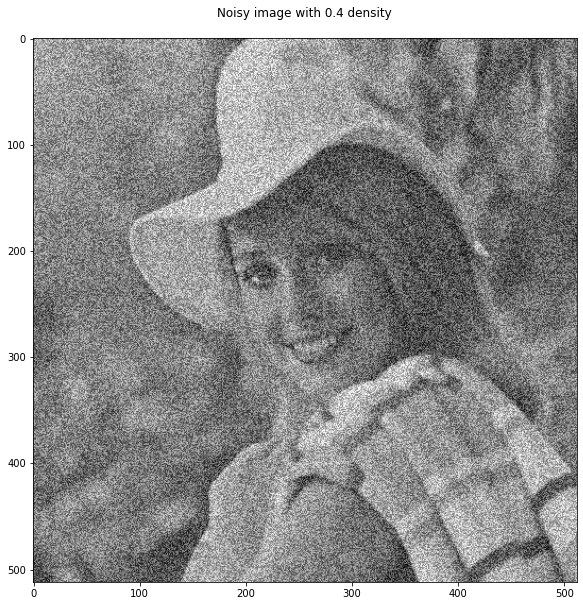

In [26]:
Noisy_image3 = salt_pepper(0.4 , elaine) 
plt.figure(figsize=(10,10))
plt.imshow(Noisy_image3)
plt.title('Noisy image with 0.4 density'+"\n")

 MSE: 94.66320419311523


Text(0.5, 1.0, 'filtered by 3x3 median filter\n')

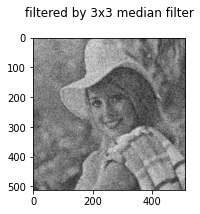

In [27]:
window_size = 3
filtered_img = cv2.medianBlur(Noisy_image3, window_size)
plt.subplot(121)

img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 3x3 median filter'+"\n")

 MSE: 91.89070129394531


Text(0.5, 1.0, 'filtered by 5x5 median filter\n')

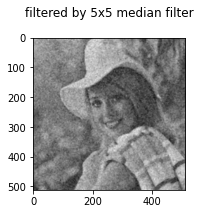

In [28]:
window_size = 5
filtered_img = cv2.medianBlur(Noisy_image3, window_size)
plt.subplot(121)

img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 5x5 median filter'+"\n")

 MSE: 91.16862869262695


Text(0.5, 1.0, 'filtered by 7x7 median filter\n')

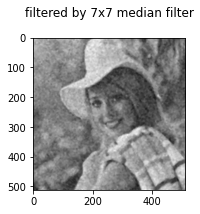

In [29]:
window_size = 7
filtered_img = cv2.medianBlur(Noisy_image3, window_size)
plt.subplot(121)

img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 7x7 median filter'+"\n")

 MSE: 91.01670455932617


Text(0.5, 1.0, 'filtered by 9x9 median filter\n')

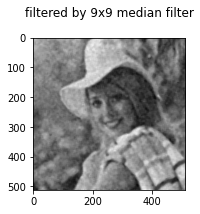

In [30]:
window_size = 9
filtered_img = cv2.medianBlur(Noisy_image3, window_size)
plt.subplot(121)

img_arr2 = np.array(elaine)
mse = np.mean((img_arr2 - filtered_img) ** 2)
print(f" MSE: {mse}")

plt.imshow(filtered_img)
plt.title('filtered by 9x9 median filter'+"\n")

***
***
***
***

#### 2.2.2. Create a program for adding Gaussian noise with different variance and filtering using average and median filter, respectively. Apply the averaging filter and the median filter to an image with Gaussian noise (with a chosen noise variance). Note: You can use imnoise and MSE functions to generate noisy images and compare the quality of images, respectively. (Test on grayscale Elaine Image)

In [32]:
elaine = cv2.imread('Elaine.bmp', cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'original image')

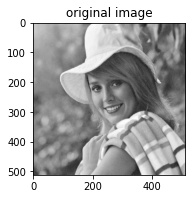

In [33]:
plt.subplot(121)
plt.imshow(elaine)
plt.title('original image')

In [31]:
import numpy as np
import cv2

def gaussian_noise(image, variance):
    # Generate Gaussian noise with mean 0 and variance specified
    h, w = image.shape
    sigma = np.sqrt(variance)
    noise = np.random.normal(0, sigma, size=(h, w))

    # Add the noise to the image
    noisy_image = image + noise

    # Clip the pixel values to the valid range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image


#### with 256 variance

Text(0.5, 1.0, 'Noisy image with 256 variance\n')

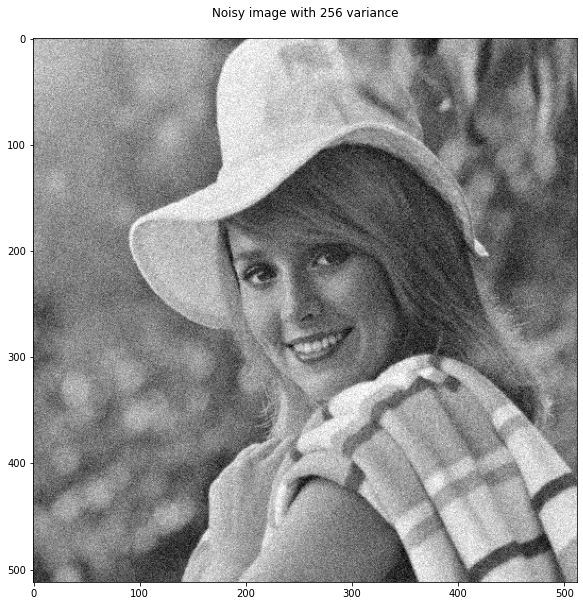

In [34]:
Noisy_image = gaussian_noise( elaine , 256) 
plt.figure(figsize=(10,10))

plt.imshow(Noisy_image)
plt.title('Noisy image with 256 variance'+"\n")


Text(0.5, 1.0, 'median , average')

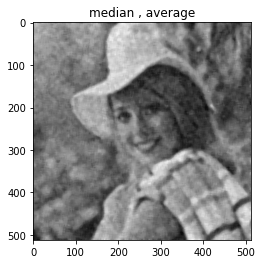

In [38]:
filtered_img = cv2.medianBlur(Noisy_image3, window_size)
filtered1_img = cv2.blur(filtered_img, (window_size, window_size))
plt.imshow(filtered_img)
plt.title(  'median , average')

Text(0.5, 1.0, 'average , median ')

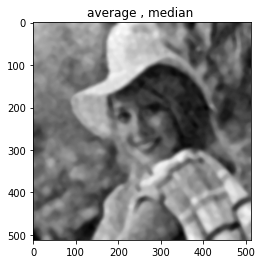

In [37]:
filtered1_img = cv2.blur(filtered_img, (window_size, window_size))
filtered_img = cv2.medianBlur(filtered1_img, window_size)
plt.imshow(filtered_img)
plt.title(  'average , median ')

#### with 1024 variance

Text(0.5, 1.0, 'Noisy image with 1024 variance\n')

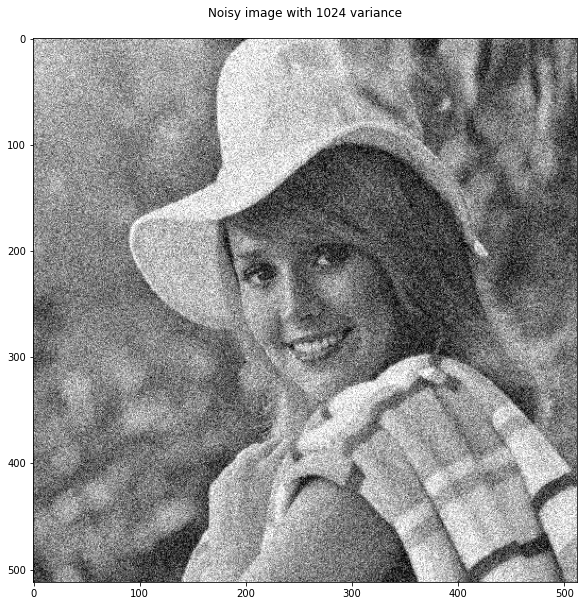

In [46]:
Noisy_image = gaussian_noise( elaine , 1024) 
plt.figure(figsize=(10,10))

plt.imshow(Noisy_image)
plt.title('Noisy image with 1024 variance'+"\n")

Text(0.5, 1.0, 'median , average')

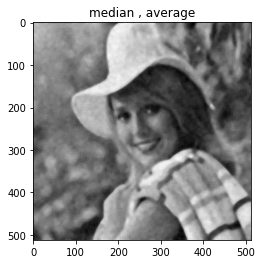

In [47]:
filtered_img = cv2.medianBlur(Noisy_image, window_size)
filtered1_img = cv2.blur(filtered_img, (window_size, window_size))
plt.imshow(filtered_img)
plt.title(  'median , average')

Text(0.5, 1.0, 'average , median ')

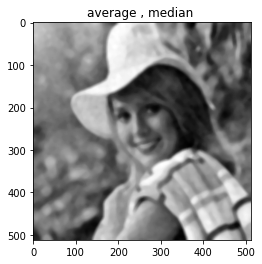

In [48]:
filtered1_img = cv2.blur(Noisy_image, (window_size, window_size))
filtered_img = cv2.medianBlur(filtered1_img, window_size)
plt.imshow(filtered_img)
plt.title(  'average , median ')

#### with 262144 variance

Text(0.5, 1.0, 'Noisy image with 262144 variance\n')

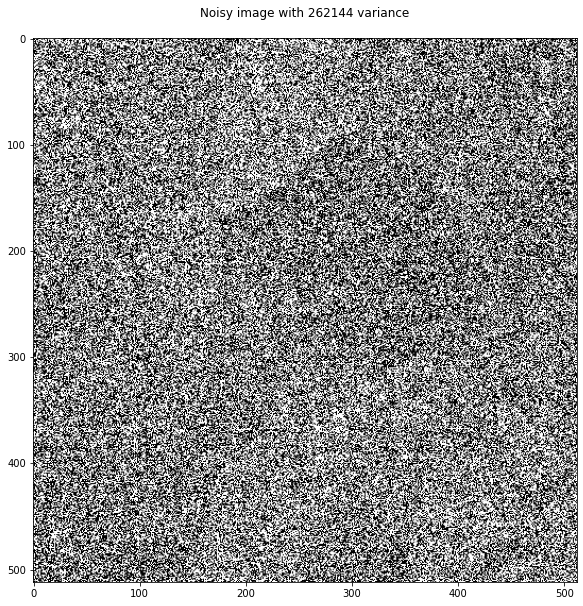

In [49]:
Noisy_image = gaussian_noise( elaine , 262144) 
plt.figure(figsize=(10,10))
plt.imshow(Noisy_image)
plt.title('Noisy image with 262144 variance'+"\n")

Text(0.5, 1.0, 'median , average')

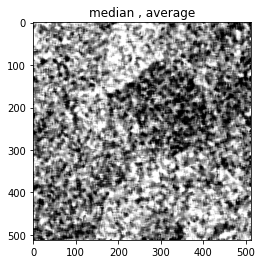

In [50]:
filtered_img = cv2.medianBlur(Noisy_image, window_size)
filtered1_img = cv2.blur(filtered_img, (window_size, window_size))
plt.imshow(filtered_img)
plt.title(  'median , average')

Text(0.5, 1.0, 'average , median ')

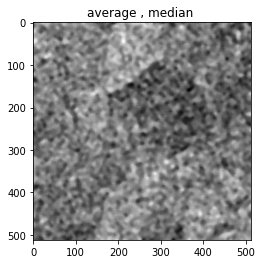

In [51]:
filtered1_img = cv2.blur(Noisy_image, (window_size, window_size))
filtered_img = cv2.medianBlur(filtered1_img, window_size)
plt.imshow(filtered_img)
plt.title(  'average , median ')

### 2.2.3 Compare the properties of the three filters

Text(0.5, 1.0, 'original image  ')

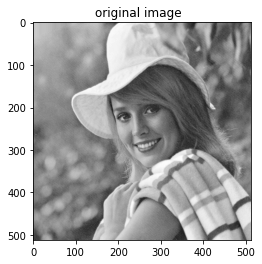

In [55]:
plt.imshow(elaine)
plt.title(  'original image  ')

Text(0.5, 1.0, 'filter a  ')

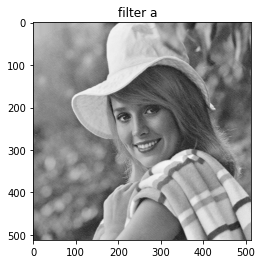

In [57]:
filter_1d = np.array([0.5, 1, -0.5], dtype=np.float32)
result_1d = cv2.filter2D(elaine, -1, filter_1d)
plt.imshow(result_1d)
plt.title(  'filter a  ')

Text(0.5, 1.0, 'filter b  ')

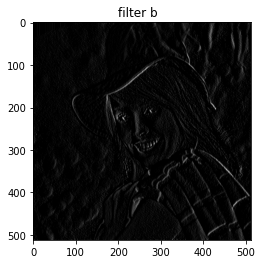

In [62]:
filter_2d = np.array([[1/6, 0, -1/6], [1/6, 0, -1/6], [1/6, 0, -1/6]], dtype=np.float32)
result_2d = cv2.filter2D(elaine, -1, filter_2d)
plt.imshow(result_2d)
plt.title(  'filter b  ')

Text(0.5, 1.0, 'filter c  ')

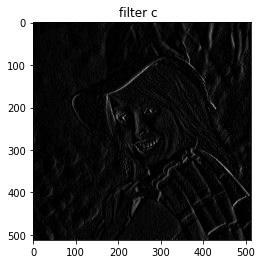

In [63]:
filter_2 = np.array([[1/8, 0, -1/8], [1/4, 0, -1/4], [1, 0, -1]], dtype=np.float32)
result_2 = cv2.filter2D(elaine, -1, filter_2)
plt.imshow(result_2)
plt.title(  'filter c  ')

### 2.2.4. design 3 filters for smoothing , sharpening and removing salt-and-pepper noise on a noisy image and combine these filters to create more sophisticated image processing pipelines that can address a wider range of problems. (Test on grayscale Elaine Image)

Text(0.5, 1.0, 'Noisy image with 256 variance\n')

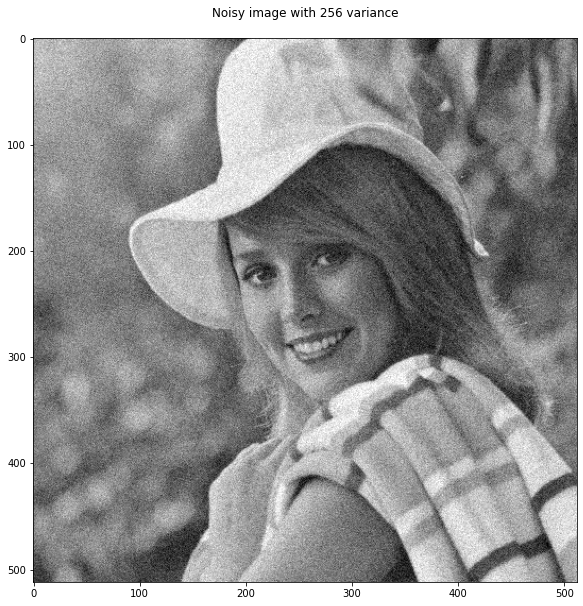

In [69]:
Noisy_image = gaussian_noise( elaine , 256) 
plt.figure(figsize=(10,10))

plt.imshow(Noisy_image)
plt.title('Noisy image with 256 variance'+"\n")

#### Sharpening Filter (Unsharp Masking):


Text(0.5, 1.0, ' sharpened_image ')

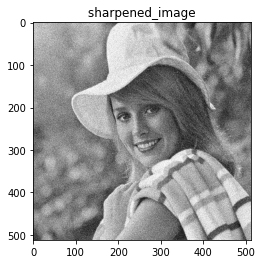

In [71]:
blurred_image = cv2.GaussianBlur(Noisy_image, (5, 5), 0)
# Create unsharp mask by subtracting blurred image from original image
unsharp_mask = cv2.subtract(Noisy_image, blurred_image)
# Add the unsharp mask back to the original image for sharpening
sharpened_image = cv2.add(Noisy_image, unsharp_mask)

plt.imshow(sharpened_image)
plt.title(  ' sharpened_image ')

#### Noise Removal Filter (Median Filter)

Text(0.5, 1.0, ' denoised_image ')

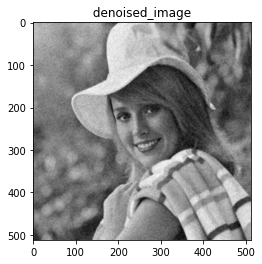

In [73]:
denoised_image = cv2.medianBlur(Noisy_image, 3)
plt.imshow(denoised_image)
plt.title(  ' denoised_image ')

#### Smoothing Filter (Gaussian Filter):

Text(0.5, 1.0, 'smoothed_image ')

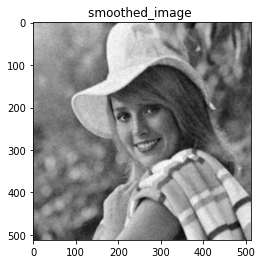

In [75]:
smoothed_image = cv2.GaussianBlur(Noisy_image, (5, 5), 0)
plt.imshow(smoothed_image)
plt.title(  'smoothed_image ')

#### Pipeline using Combination of Filters



Text(0.5, 1.0, ' output image ')

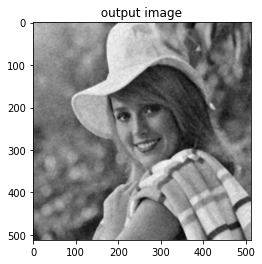

In [77]:
# Apply Gaussian filter for initial smoothing
smoothed_image = cv2.GaussianBlur(Noisy_image, (5, 5), 0)

# Create unsharp mask by subtracting smoothed image from original image
unsharp_mask = cv2.subtract(Noisy_image, smoothed_image)

# Add the unsharp mask back to the original image for sharpening
sharpened_image = cv2.add(Noisy_image, unsharp_mask)

# Apply median filter for noise removal on sharpened image
denoised_sharpened_image = cv2.medianBlur(sharpened_image, 5)

plt.imshow(denoised_sharpened_image)
plt.title(  ' output image ')